INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'évaluation de la qualité des images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim, compare_psnr

Lecture d'une image, et altération de celli-ci pour comparer PSNR et SSIM. 

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:], [0.299, 0.587, 0.114])

image = plt.imread('RGB.jpg')
image = rgb2gray(image)

bruit = (np.zeros_like(image) - 0.5 + np.random.random(size=image.shape)) *30
constante = np.ones_like(image) * 30

imagebruit = image + bruit  #Ajout d'un bruit aléatoire
imagebruit = np.clip(imagebruit,0,255).astype('uint8')
imageplusconstante = image + constante #Ajout d'une constante
imageimageplusconstante = np.clip(imageplusconstante,0,255).astype('uint8')
image = image.astype('uint8')

Application des mesures PSNR et SSIM. Affichage des résultats et des images associées.

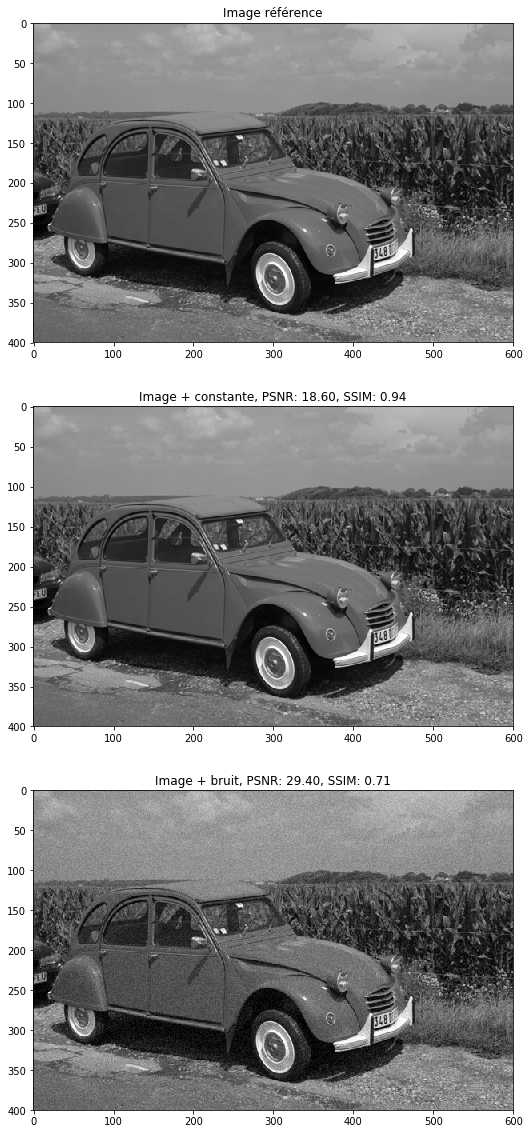

In [3]:
psnr1 = compare_psnr(image, imagebruit)
psnr2 = compare_psnr(image, imageimageplusconstante)
ssim1 = compare_ssim(image, imagebruit)
ssim2 = compare_ssim(image, imageimageplusconstante)

label = 'PSNR: {:.2f}, SSIM: {:.2f}'
f, axarr = plt.subplots(3, 1, figsize=(10,20))
axarr[0].imshow(image,cmap = plt.get_cmap('gray'))
axarr[0].set_title('Image référence')
axarr[1].imshow(imageplusconstante,cmap = plt.get_cmap('gray'))
axarr[1].set_title('Image + constante, '+ label.format(psnr2,ssim2))
axarr[2].imshow(imagebruit,cmap = plt.get_cmap('gray'))
axarr[2].set_title('Image + bruit, '+ label.format(psnr1,ssim1))

plt.show()

Noter que PSNR et SSIM ne sont pas en accord sur la qualité des images.